In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns

**TASK 1: Load the dataset. Display the number of rows and columns. Display the titles,genres of first 50 movies from the dataset.**

In [2]:
movie = pd.read_csv("{File_Name with complete path}")
movie.shape

(4803, 20)

In [3]:
# Json Treatment of columns having json data in them
for a in ['genres','keywords','production_companies','production_countries','spoken_languages']:
    for i in np.arange(4803):
        ob = json.loads(movie[a][i])
        temp = ""
        for j in np.arange(len(ob)):
            if (temp==""):
                temp = temp+ob[j]['name']
            else:
                temp=temp+","+ob[j]['name']
        movie[a][i] = temp

C:\Users\hbhar\AppData\Local\Temp\ipykernel_1756\537443545.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie[a][i] = temp


In [4]:
movie.head(50)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"Action,Adventure,Fantasy,Science Fiction",http://www.avatarmovie.com/,19995,"culture clash,future,space war,space colony,so...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",10-12-2009,2787965087,162.0,"English,Español",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"Adventure,Fantasy,Action",http://disney.go.com/disneypictures/pirates/,285,"ocean,drug abuse,exotic island,east india trad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,19-05-2007,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"Action,Adventure,Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy,based on novel,secret agent,sequel,mi6,bri...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",26-10-2015,880674609,148.0,"Français,English,Español,Italiano,Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"Action,Crime,Drama,Thriller",http://www.thedarkknightrises.com/,49026,"dc comics,crime fighter,terrorist,secret ident...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,16-07-2012,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"Action,Adventure,Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel,mars,medallion,space travel,pri...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,07-03-2012,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"Fantasy,Action,Adventure",http://www.sonypictures.com/movies/spider-man3/,559,"dual identity,amnesia,sandstorm,love of one's ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"Columbia Pictures,Laura Ziskin Productions,Mar...",United States of America,01-05-2007,890871626,139.0,"English,Français",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"Animation,Family",http://disney.go.com/disneypictures/tangled/,38757,"hostage,magic,horse,fairy tale,musical,princes...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"Walt Disney Pictures,Walt Disney Animation Stu...",United States of America,24-11-2010,591794936,100.0,English,Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"Action,Adventure,Science Fiction",http://marvel.com/movies/movie/193/avengers_ag...,99861,"marvel comic,sequel,superhero,based on comic b...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"Marvel Studios,Prime Focus,Revolution Sun Studios",United States of America,22-04-2015,1405403694,141.0,English,Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767
8,250000000,"Adventure,Fantasy,Family",http://harrypotter.warnerbros.com/harrypottera...,767,"witch,magic,broom,school of witchcraft,wizardr...",en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"Warner Bros.,Heyday Films","United Kingdom,United States of America",07-07-2009,933959197,153.0,English,Released,Dark Secrets Revealed,Harry Potter and the Half-Blood Prince,7.4,5293
9,250000000,"Action,Adventure,Fantasy",http://www.batmanvsupermandawnofjustice.com/,209112,"dc comics,vigilante,

**TASK 2: Identify the column with null values and perform null value treatment.**

In [5]:
movie.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [6]:
movie.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [7]:
# Numerical column null value treatment we fill the value using median of the column
movie['runtime'].fillna(movie['runtime'].median(),inplace=True)
movie['runtime'].isnull().sum()

0

In [8]:
# For categorical columns we first seperate those columns and then using the name we apply a filter to fill a string 'No Data'
categorical = movie.select_dtypes(include = 'object')
for i in categorical.columns:
    movie[i].fillna("No Data",inplace=True)

In [9]:
movie.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

**TASK 3: Display the movie categories that have a budget greater than 220,000**

In [10]:
movie["genres"][movie["budget"]>220000]

0       Action,Adventure,Fantasy,Science Fiction
1                       Adventure,Fantasy,Action
2                         Action,Adventure,Crime
3                    Action,Crime,Drama,Thriller
4               Action,Adventure,Science Fiction
                          ...                   
4680                       Crime,Horror,Thriller
4682                                      Horror
4720                                       Drama
4758                    Thriller,Science Fiction
4770                                Drama,Comedy
Name: genres, Length: 3684, dtype: object

**TASK 4: Display the movie categories that have a revenue greater than 961,000,000**

In [11]:
movie["genres"][movie["revenue"]>961000000]

0       Action,Adventure,Fantasy,Science Fiction
3                    Action,Crime,Drama,Thriller
7               Action,Adventure,Science Fiction
12                      Adventure,Fantasy,Action
16              Science Fiction,Action,Adventure
17                      Adventure,Action,Fantasy
25                        Drama,Romance,Thriller
26              Adventure,Action,Science Fiction
28     Action,Adventure,Science Fiction,Thriller
29                     Action,Adventure,Thriller
31              Action,Adventure,Science Fiction
32                      Family,Fantasy,Adventure
36              Science Fiction,Action,Adventure
42                       Animation,Family,Comedy
44                                        Action
52              Action,Science Fiction,Adventure
65                   Drama,Action,Crime,Thriller
78                Family,Adventure,Drama,Fantasy
98                      Adventure,Fantasy,Action
124                   Animation,Adventure,Family
197                 

**TASK 5: Remove the row with value 0 from both budget and revenue columns.**

In [12]:
movie.drop( movie[ (movie["budget"]==0) & (movie["revenue"]==0)].index,inplace=True)
movie.reset_index(drop=True)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"Action,Adventure,Fantasy,Science Fiction",http://www.avatarmovie.com/,19995,"culture clash,future,space war,space colony,so...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",10-12-2009,2787965087,162.0,"English,Español",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"Adventure,Fantasy,Action",http://disney.go.com/disneypictures/pirates/,285,"ocean,drug abuse,exotic island,east india trad...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures,Jerry Bruckheimer Films,S...",United States of America,19-05-2007,961000000,169.0,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"Action,Adventure,Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy,based on novel,secret agent,sequel,mi6,bri...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures,Danjaq,B24","United Kingdom,United States of America",26-10-2015,880674609,148.0,"Français,English,Español,Italiano,Deutsch",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"Action,Crime,Drama,Thriller",http://www.thedarkknightrises.com/,49026,"dc comics,crime fighter,terrorist,secret ident...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures,Warner Bros.,DC Entertainme...",United States of America,16-07-2012,1084939099,165.0,English,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"Action,Adventure,Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel,mars,medallion,space travel,pri...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,07-03-2012,284139100,132.0,English,Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3908,13,Horror,http://tincanmanthemovie.com/,157185,home invasion,en,Tin Can Man,Recently dumped by his girlfirend for another ...,0.332679,"Park Films,Camera Stylo Films",Ireland,01-01-2007,0,84.0,English,Released,Everything You've Heard is True,Tin Can Man,2.0,1
3909,20000,"Crime,Horror,Mystery,Thriller",No Data,36095,"japan,prostitute,hotel,based on novel,hallucin...",ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,Daiei Studios,Japan,06-11-1997,99000,111.0,日本語,Released,Madness. Terror. Murder.,Cure,7.4,63
3910,7000,"Science Fiction,Drama,Thriller",http://www.primermovie.com,14337,"distrust,garage,identity crisis,time travel,ti...",en,Primer,Friends/fledgling entrepreneurs invent a devic...,23.307949,Thinkfilm,United States of America,08-10-2004,424760,77.0,English,Released,What happens if it actually works?,Primer,6.9,658
3911,220000,"Action,Crime,Thriller",No Data,9367,"united states–mexico barrier,legs,arms,paper k...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,Columbia Pictures,"Mexico,United States of America",04-09-1992,2040920,81.0,Español,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238


**TASK 6:List the top 10 movies with highest revenue and top 10 movies with least budget.**

In [13]:
#top 10 movies with highest revenue
movie.sort_values('revenue',ascending=False,inplace=False).head(10).reset_index(drop=True)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"Action,Adventure,Fantasy,Science Fiction",http://www.avatarmovie.com/,19995,"culture clash,future,space war,space colony,so...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners,Twentieth Century Fox ...","United States of America,United Kingdom",10-12-2009,2787965087,162.0,"English,Español",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,200000000,"Drama,Romance,Thriller",http://www.titanicmovie.com,597,"shipwreck,iceberg,ship,panic,titanic,ocean lin...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"Paramount Pictures,Twentieth Century Fox Film ...",United States of America,18-11-1997,1845034188,194.0,"English,Français,Deutsch,svenska,Italiano,Pусский",Released,Nothing on Earth could come between them.,Titanic,7.5,7562
2,220000000,"Science Fiction,Action,Adventure",http://marvel.com/avengers_movie/,24428,"new york,shield,marvel comic,superhero,based o...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"Paramount Pictures,Marvel Studios",United States of America,25-04-2012,1519557910,143.0,English,Released,Some assembly required.,The Avengers,7.4,11776
3,150000000,"Action,Adventure,Science Fiction,Thriller",http://www.jurassicworld.com/,135397,"monster,dna,tyrannosaurus rex,velociraptor,isl...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"Universal Studios,Amblin Entertainment,Legenda...",United States of America,09-06-2015,1513528810,124.0,English,Released,The park is open.,Jurassic World,6.5,8662
4,190000000,Action,http://www.furious7.com/,168259,"car race,speed,revenge,suspense,car,race,muscl...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"Universal Pictures,Original Film,Fuji Televisi...","Japan,United States of America",01-04-2015,1506249360,137.0,English,Released,Vengeance Hits Home,Furious 7,7.3,4176
5,280000000,"Action,Adventure,Science Fiction",http://marvel.com/movies/movie/193/avengers_ag...,99861,"marvel comic,sequel,superhero,based on comic b...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"Marvel Studios,Prime Focus,Revolution Sun Studios",United States of America,22-04-2015,1405403694,141.0,English,Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767
6,150000000,"Animation,Adventure,Family",http://movies.disney.com/frozen,109445,"queen,musical,princess,betrayal,snowman,animat...",en,Frozen,Young princess Anna of Arendelle dreams about ...,165.125366,"Walt Disney Pictures,Walt Disney Animation Stu...",United States of America,27-11-2013,1274219009,102.0,English,Released,Only the act of true love will thaw a frozen h...,Frozen,7.3,5295
7,200000000,"Action,Adventure,Science Fiction",http://marvel.com/ironman3,68721,"terrorist,war on terror,tennessee,malibu,marve...",en,Iron Man 3,When Tony Stark's world is torn apart by a for...,77.682080,Marvel Studios,"China,United States of America",18-04-2013,1215439994,130.0,English,Released,Unleash the power behind the armor.,Iron Man 3,6.8,8806
8,74000000,"Family,Animation,Adventure,Comedy",http://www.minionsmovie.com/,211672,"assistant,aftercreditsstinger,duringcreditssti...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"Universal Pictures,Illumination Entertainment",United States of America,17-06-2015,1156730962,91.0,English,Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571
9,250000000,"Adventure,Action,Science Fiction",http://marvel.com/captainamericapremiere,271110,"civil war,war,marvel comic,sequel,superhero,ba...",en,Captain America: Civil War,"Following the events of Age of Ultron, the col...",198.372395,"Studio Babelsberg,Marvel Studios,Walt Disney S...",U

In [14]:
#top 10 movies with lowest revenue
movie.sort_values('revenue',ascending=True,inplace=False).head(10).reset_index(drop=True)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,9000,"Comedy,Romance",No Data,72766,,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,,,26-12-2011,0,85.0,,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
1,7700000,"Drama,War",No Data,283708,"fire,classroom,hostage,rain,horse,rifle,childr...",fr,Loin des hommes,A French teacher in a small Algerian village d...,3.363973,"Procirep,Canal+,One World Films,Pathé,Ciné+,Ce...",France,30-08-2014,0,110.0,"العربية,Français,Español",Released,No Data,Far from Men,6.6,43
2,8000000,"Action,Crime,Thriller",No Data,389425,,en,Code of Honor,Colonel Robert Sikes is on a mission to rid hi...,2.101718,"Steamroller Productions,Premiere Entertainment...",United States of America,06-05-2016,0,106.0,"English,Deutsch",Released,There is no honor in revenge.,Code of Honor,4.1,16
3,8000000,Drama,No Data,374461,"cook,friendship",en,Mr. Church,A unique friendship develops when a little gir...,7.828459,"Envision Media Arts,Cinelou Films,Shenghua Ent...",United States of America,16-09-2016,0,104.0,English,Released,He was the one person she could always count on.,Mr. Church,7.0,129
4,8000000,"Crime,Horror,Thriller",No Data,12192,"female nudity,pathology,student of medicine,ex...",en,Pathology,Medical student Ted Grey (Milo Ventimiglia) gr...,9.782433,"Lakeshore Entertainment,Metro-Goldwyn-Mayer (M...",United States of America,11-04-2008,0,95.0,English,Released,No body is safe.,Pathology,5.6,144
5,7200000,"Comedy,Drama,History",No Data,46138,"machinist,aftercreditsstinger,duringcreditssti...",en,Made in Dagenham,A dramatization of the 1968 strike at the Ford...,6.138802,"BBC Films,HanWay Films,UK Film Council,Audley ...",United Kingdom,11-09-2010,0,113.0,English,Released,"In the fight for equal rights, an ordinary wom...",Made in Dagenham,6.6,94
6,8000000,"Comedy,Thriller,Music,Crime,Mystery",No Data,1958,"upper class,women,father murder,daughter,maid,...",fr,8 femmes,Eight women gather to celebrate Christmas in a...,8.204829,"France 2 Cinéma,Fidélité Productions,Le Studio...","France,Italy",08-01-2002,0,111.0,Français,Released,Living in a house full of women can be murder.,8 Women,6.9,196
7,60000000,"Action,Crime,Drama,Thriller",No Data,8838,"assassin,loss of family,autism,fbi,bangkok,nat...",en,Mercury Rising,Renegade FBI agent Art Jeffries protects a nin...,18.877795,"Imagine Entertainment,Universal Pictures",United States of America,03-04-1998,0,111.0,English,Released,Someone knows too much.,Mercury Rising,6.0,368
8,8000000,"Comedy,Drama,Romance",No Data,14629,woman director,en,Woman on Top,"Set to the intoxicating rhythms of Brazil, ""Wo...",3.535789,Fox Searchlight Pictures,United States of America,22-09-2000,0,92.0,"Português,English",Released,Want to know how she got there?,Woman on Top,5.5,46
9,8000000,"Comedy,Romance",No Data,23570,"independent film,mistaken identity",en,The Pallbearer,Aspiring architect Tom Thompson is told by mys...,2.149469,"Miramax Films,The Chess Club",United States of America,03-05-1996,0,97.0,English,Released,Something magical is about to unfold in the mo...,The Pallbearer,4.6,30


**TASK 7: How are popularities of movies related with the movie budgets? Are they corelated or completely uncorelated with each other.Write the interpretations of your analysis.**

In [15]:
print(movie['popularity'].corr(movie['budget']))

0.460358410546727


Analysis:
The popularity and budget are positively linear dependency.The correlation indicates that if one value increases, the other will also increase.

**TASK 8: Identify and display the names of all production company along with the number of times they appear in the dataset.**

In [16]:
movie['production_companies'].value_counts()

                                                                       100
Paramount Pictures                                                      55
Universal Pictures                                                      40
Columbia Pictures                                                       34
New Line Cinema                                                         31
                                                                      ... 
New Line Cinema,Eric's Boy                                               1
PolyGram Filmed Entertainment,The Guber-Peters Company,Warner Bros.      1
Alcon Entertainment,Left Tackle Pictures,Zucker/Netter Productions       1
New Line Cinema,Rat Entertainment                                        1
Daiei Studios                                                            1
Name: production_companies, Length: 3165, dtype: int64

**TASK 9: Display the names of top 25 production comapnies based on the number of movies they have produced in descending order of the number of movies produced.**

In [17]:
movie['production_companies'].value_counts()[:25]

                                                      100
Paramount Pictures                                     55
Universal Pictures                                     40
Columbia Pictures                                      34
New Line Cinema                                        31
Metro-Goldwyn-Mayer (MGM)                              29
Twentieth Century Fox Film Corporation                 27
Warner Bros.                                           25
Walt Disney Pictures                                   23
Touchstone Pictures                                    19
Columbia Pictures Corporation                          15
Dimension Films                                        15
DreamWorks Animation                                   12
Walt Disney Pictures,Pixar Animation Studios           11
Miramax Films                                          11
United Artists                                         11
Fox 2000 Pictures                                       9
Walt Disney Pi

**TASK 10: Sort the data in descending order based on revenue and filter the top 500 movies.Find the measures of central tendency for budget,revenue,runtime using the filtered data.Perform outlier analysis for these columns using box plots.**

In [18]:
#sorting the data based on revenue
top = ((movie.sort_values('revenue',ascending=False,inplace=False)).head(500)).reset_index(drop = True)

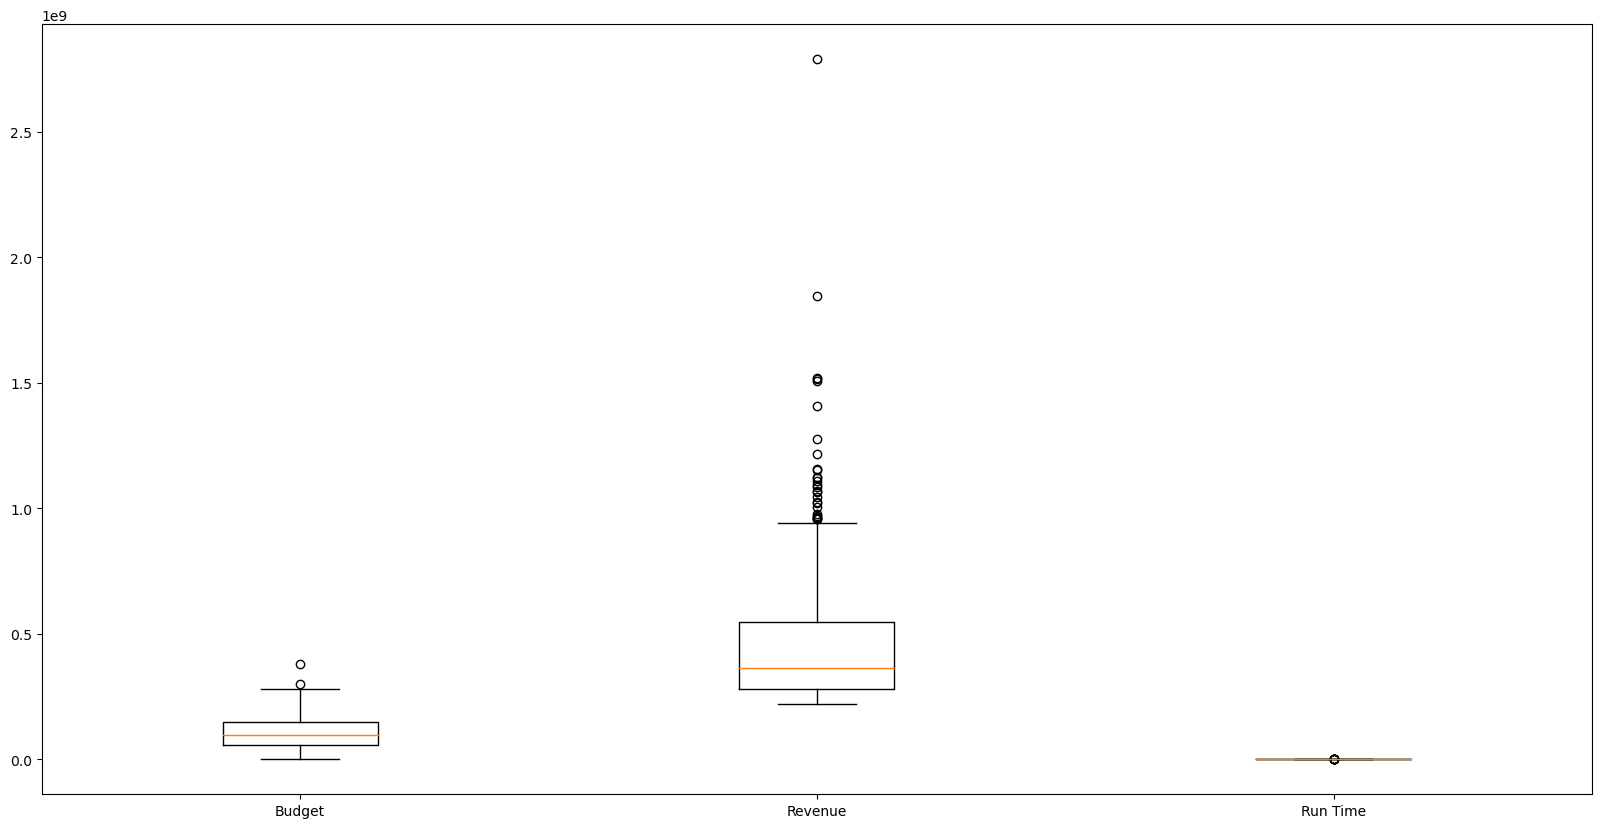

In [19]:
#box plots for three columns on filtered data
fig,ax = plt.subplots(figsize=(20,10))
ax.boxplot(x=[top["budget"],top["revenue"],top["runtime"]],labels=["Budget","Revenue","Run Time"])
plt.show()

Interpretation - As per the observation from the boxplots, it is clear that the budget and revenue columns do have outliers but the same can not be said about the run-time column.

**TASK 11: Identify and list the names of movies aong with its run time for movies that have above average runtime,using the data from previous task.** 

In [20]:
movie["original_title"][movie["runtime"]>(movie['runtime'].mean())]

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4720                       The Birth of a Nation
4722                           Facing the Giants
4755                                    Counting
4766                              The Last Waltz
4792                                         キュア
Name: original_title, Length: 1606, dtype: object

**Task 12: Display the distribution of the dataset as per the budget of the movies**

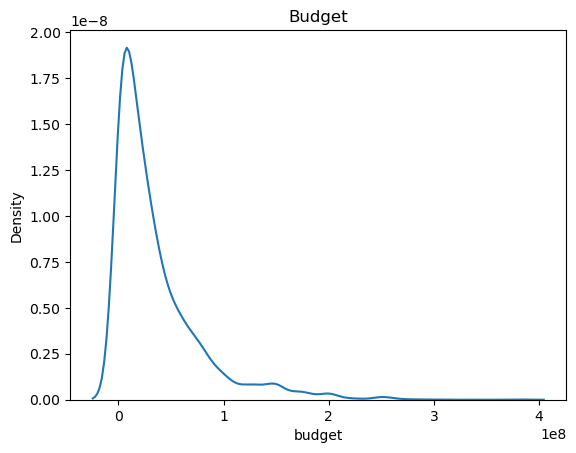

In [24]:
sns.kdeplot(data=movie,x=movie['budget'])
plt.title("Budget")
plt.show()

The majority of the movies have a budget of less than 10,00,00,000 $.

**Task 13: Display the distribution of the movies as per their runtime.**

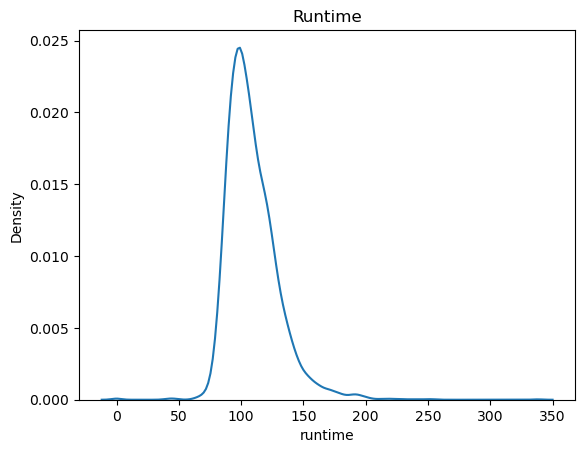

In [30]:
sns.kdeplot(data=movie,x=movie['runtime'])
plt.title("Runtime")
plt.show()

The majority of the movies have runtime of 70-140 minutes.

**Task 14: Display the relation of the runtime of the movie and the average vote they are getting.**

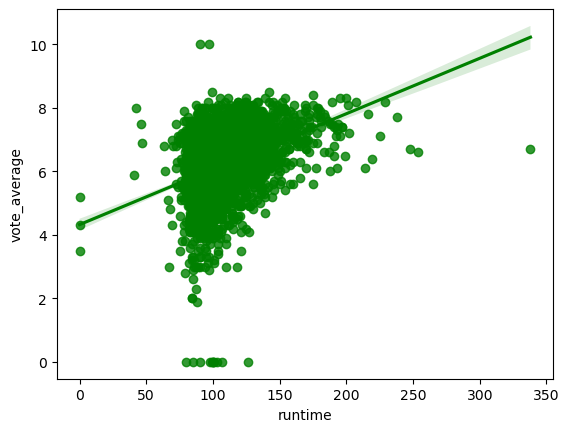

In [29]:
sns.regplot(x=movie['runtime'],y=movie['vote_average'],color='green');

The average vote of a movie is positively corelated to runtime of the movie and it increases with higher runtime movies.